In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
csv = pd.read_csv ('logs/ecdsaLog.csv')
df = pd.DataFrame(csv)
print(df)

                                 recordID                   recordType  \
0    3349832c-0232-4f40-8c46-99e5cb1b8079                       SHA256   
1    387b99b1-11c2-4887-b4bd-5e1053aafc59                       SHA256   
2    f4feac3b-acee-4623-a93d-acbbe550f30a                       SHA256   
3    11699c09-0df5-482f-a0aa-83891bc5a5db                       SHA256   
4    4b6bf98e-bc96-42fb-a6cc-8c536ba223ae                       SHA256   
..                                    ...                          ...   
295  3a94eee0-c738-49ed-aacd-e9e0f92aeb88  SphincsPlus256Robust_verify   
296  a183c722-f082-49bd-9196-96e51bafab39  SphincsPlus256Robust_verify   
297  60655ac5-400a-4d76-be4b-a9bcd635ca62  SphincsPlus256Robust_verify   
298  e02b1056-c4cb-4cac-976a-b4dd3b8f6f41  SphincsPlus256Robust_verify   
299  b7adc4b0-ad27-4646-9df4-9668b1a08ed2  SphincsPlus256Robust_verify   

     elapsedTime  PrivateKeySize  PublicKeySize  hashString  signatureSize  
0            900             NaN  

In [3]:
dfAvg = pd.DataFrame(columns=['RecordType', 'AttributeType', 'AttributeAvg', 'AttributeMin', 'AttributeMax', 'AttributeMedian'])
for i in range(0, len(df["recordType"].unique())):
    dfHelperElapsedTime = pd.DataFrame(
        [[df["recordType"].unique()[i], 
          "elapsedTime", 
          df["elapsedTime"].loc[df["recordType"]== df["recordType"].unique()[i]].mean(), 
          df["elapsedTime"].loc[df["recordType"]== df["recordType"].unique()[i]].min(), 
          df["elapsedTime"].loc[df["recordType"]== df["recordType"].unique()[i]].max(), 
          df["elapsedTime"].loc[df["recordType"]== df["recordType"].unique()[i]].median()]],
        columns=['RecordType', 'AttributeType', 'AttributeAvg', 'AttributeMin', 'AttributeMax', 'AttributeMedian'], index=[i])
    #print(dfHelper)
    dfAvg = pd.concat([dfAvg, dfHelperElapsedTime])
    
    dfHelperPrivateKeySize = pd.DataFrame(
        [[df["recordType"].unique()[i], 
          "PrivateKeySize", 
          df["PrivateKeySize"].loc[df["recordType"]== df["recordType"].unique()[i]].mean(), 
          df["PrivateKeySize"].loc[df["recordType"]== df["recordType"].unique()[i]].min(), 
          df["PrivateKeySize"].loc[df["recordType"]== df["recordType"].unique()[i]].max(), 
          df["PrivateKeySize"].loc[df["recordType"]== df["recordType"].unique()[i]].median()]],
        columns=['RecordType', 'AttributeType', 'AttributeAvg', 'AttributeMin', 'AttributeMax', 'AttributeMedian'], index=[i])
    
    dfAvg = pd.concat([dfAvg, dfHelperPrivateKeySize])
    
    dfHelperPublicKeySize = pd.DataFrame(
        [[df["recordType"].unique()[i], 
          "PublicKeySize", 
          df["PublicKeySize"].loc[df["recordType"]== df["recordType"].unique()[i]].mean(), 
          df["PublicKeySize"].loc[df["recordType"]== df["recordType"].unique()[i]].min(), 
          df["PublicKeySize"].loc[df["recordType"]== df["recordType"].unique()[i]].max(), 
          df["PublicKeySize"].loc[df["recordType"]== df["recordType"].unique()[i]].median()]],
        columns=['RecordType', 'AttributeType', 'AttributeAvg', 'AttributeMin', 'AttributeMax', 'AttributeMedian'], index=[i])
    
    dfAvg = pd.concat([dfAvg, dfHelperPublicKeySize])
    
    dfHelperSignatureSize = pd.DataFrame(
        [[df["recordType"].unique()[i], 
          "signatureSize", 
          df["signatureSize"].loc[df["recordType"]== df["recordType"].unique()[i]].mean(), 
          df["signatureSize"].loc[df["recordType"]== df["recordType"].unique()[i]].min(), 
          df["signatureSize"].loc[df["recordType"]== df["recordType"].unique()[i]].max(), 
          df["signatureSize"].loc[df["recordType"]== df["recordType"].unique()[i]].median()]],
        columns=['RecordType', 'AttributeType', 'AttributeAvg', 'AttributeMin', 'AttributeMax', 'AttributeMedian'], index=[i])
    
    dfAvg = pd.concat([dfAvg, dfHelperSignatureSize])
    
dfAvg.to_csv('logs/results.csv', encoding='utf-8', index=False)

/home/azureuser/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/azureuser/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/azureuser/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/azureuser/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/azureuser/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/azureuser/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
 

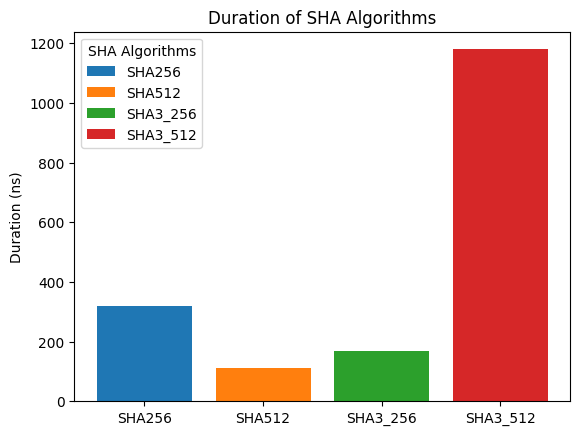

In [4]:
#SHA_Comparison
filter = ['SHA256', 'SHA512', 'SHA3_256', 'SHA3_512']
x = np.arange(len(dfAvg[dfAvg["RecordType"].isin(filter)]))  # the label locations
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
fig, ax = plt.subplots()
ax.bar(filter, dfAvg.loc[(dfAvg["RecordType"].isin(filter)) & (dfAvg["AttributeType"]=="elapsedTime")]["AttributeAvg"], label = filter ,color=bar_colors)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Duration (ns)')
ax.set_title('Duration of SHA Algorithms')
ax.legend(title = "SHA Algorithms")

plt.savefig('images/SHA_Algos.png')
plt.show()


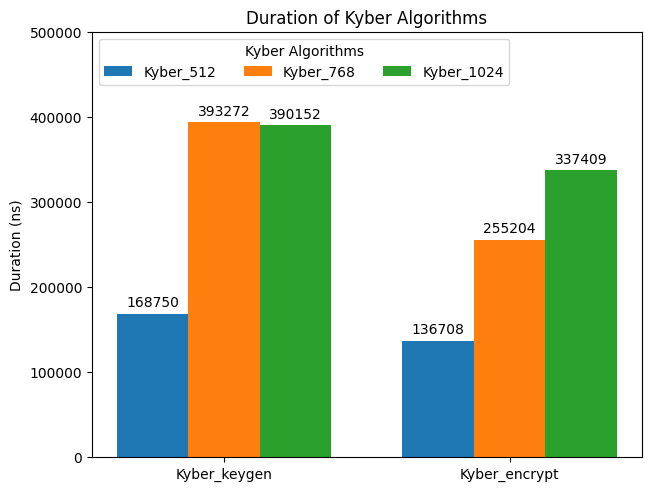

In [39]:
#Kyber_Comparison
filterKeygen = (dfAvg[dfAvg["RecordType"].str.contains("Kyber_keygen")]["RecordType"].unique())
filterEncrypt = (dfAvg[dfAvg["RecordType"].str.contains("Kyber_encrypt")]["RecordType"].unique())
labels = ['Kyber_512', 'Kyber_768', 'Kyber_1024']
legendLabels = ['Kyber_keygen', 'Kyber_encrypt']

x = np.arange(len(legendLabels))  # the label locations
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

dfCache2 = {}
for i in range(0, len(labels)):
    offset = width * multiplier
    dfCache2[i] = [dfAvg.loc[(dfAvg["RecordType"]==filterKeygen[i]) & (dfAvg["AttributeType"]=="elapsedTime")]["AttributeAvg"].item(), 
                    dfAvg.loc[(dfAvg["RecordType"]==filterEncrypt[i]) & (dfAvg["AttributeType"]=="elapsedTime")]["AttributeAvg"].item()]

    rects = ax.bar(x + offset , 
                   dfCache2[i],
                   width, 
                   label = labels[i]
                   )
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Duration (ns)')
ax.set_title('Duration of Kyber Algorithms')
ax.set_xticks(x + width, legendLabels)
ax.legend(title = "Kyber Algorithms", loc='upper left', ncols=3)
ax.set_ylim(0, 500000)

plt.savefig('images/Kyber_Algos.png')
plt.show()
